In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics

np.random.seed(3)
tf.random.set_seed(3)

train_datagen = ImageDataGenerator(rescale = 1./255, # 이미지 크기 바꾸기. 0~255의 RGB값 가짐.
                                  horizontal_flip = True, # 이미지 수평 뒤집기
                                  width_shift_range = 0.1,# 전체크기의 10% 범위에서 수평이동
                                  height_shift_range = 0.1, # 수직이동
                                   rotation_range = 5, # 정해진 각도만큼 이미지 회전시키기
                                   shear_range = 0.7, # 좌표 하나 고정시키고 몇개의 좌표 이동.
                                   zoom_range = 1.2, # 축소 또는 확대
                                   vertical_flip = True, # 이미지 수직 뒤집기
                                  fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory('./train',
                                                   target_size = (150, 150), # 이미지 크기
                                                   batch_size = 5,
                                                   class_mode = 'binary') # 2진분류

# 테스트셋은 이미지 부풀리기 과정 진행 안함. 정규화 작업만하기.
test_datagen = ImageDataGenerator(rescale = 1./255)


test_generator = test_datagen.flow_from_directory('./test',
                                                  target_size = (150, 150),
                                                  batch_size = 5,
                                                  class_mode = 'binary')

# CNN 모델 적용하기
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()


Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_5 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_6 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
______________________________________

c:\users\ad\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
100/100 [==============================] - 3s 21ms/step - loss: 0.3505 - accuracy: 0.8512 - val_loss: 0.0889 - val_accuracy: 0.9500


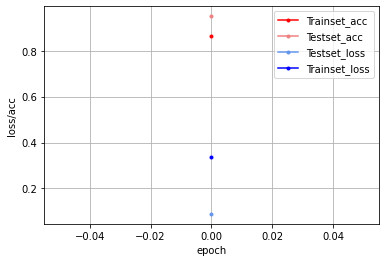

In [20]:
# 모델 컴파일하기
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizers.Adam(learning_rate = 0.0002),
             metrics = ['accuracy'])

# 모델 실행하기
history = model.fit_generator(train_generator, 
                              steps_per_epoch = 100, 
                              epochs = 20,
                             validation_data = test_generator, 
                              validation_steps = 4)

# 결과 그래프로 표현하기
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker = '.', c = "red", label = 'Trainset_acc')
plt.plot(x_len, val_acc, marker = '.', c = "lightcoral", label = 'Testset_acc')
plt.plot(x_len, y_vloss, marker = '.', c = "cornflowerblue", label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = "blue", label = 'Trainset_loss')

plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()

c:\users\ad\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
30/30 [==============================] - 3s 66ms/step - loss: 0.3417 - accuracy: 0.8823 - val_loss: 0.0880 - val_accuracy: 1.0000
Epoch 2/20
30/30 [==============================] - 2s 60ms/step - loss: 0.2618 - accuracy: 0.8824 - val_loss: 0.1731 - val_accuracy: 0.8500
Epoch 3/20
30/30 [==============================] - 2s 59ms/step - loss: 0.3863 - accuracy: 0.7929 - val_loss: 0.1453 - val_accuracy: 0.9500
Epoch 4/20
30/30 [==============================] - 2s 59ms/step - loss: 0.2781 - accuracy: 0.8934 - val_loss: 0.2480 - val_accuracy: 0.9500
Epoch 5/20
30/30 [==============================] - 2s 58ms/step - loss: 0.2573 - accuracy: 0.8837 - val_loss: 0.1050 - val_accuracy: 0.9500
Epoch 6/20
30/30 [==============================] - 2s 58ms/step - loss: 0.2896 - accuracy: 0.8714 - val_loss: 0.3907 - val_accuracy: 0.8500
Epoch 7/20
30/30 [==============================] - 2s 58ms/step - loss: 0.2418 - accuracy: 0.9330 - val_loss: 0.1361 - val_accuracy: 0.9000
Epoch 8/20
30

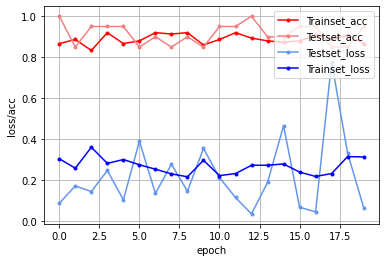

In [21]:
# 모델 컴파일하기
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizers.Adam(learning_rate = 0.0002),
             metrics = ['accuracy'])

# 모델 실행하기
history = model.fit_generator(train_generator,  # steps_per_epoch = 100일때는 안나옴..
                              steps_per_epoch = 30, # 한번의 epoch에서 훈련에 사용할 배치의 개수 지정
                              epochs = 20, # 데이터 셋 20번 훈련
                              validation_data = test_generator, 
                              validation_steps = 4) # 한번의 epoch가 끝날 때 테스트에 사용되는 배치 수 지정

# 결과 그래프로 표현하기
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker = '.', c = "red", label = 'Trainset_acc')
plt.plot(x_len, val_acc, marker = '.', c = "lightcoral", label = 'Testset_acc')
plt.plot(x_len, y_vloss, marker = '.', c = "cornflowerblue", label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = "blue", label = 'Trainset_loss')

plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()

c:\users\ad\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
30/30 - 2s - loss: 0.2152 - accuracy: 0.9200 - val_loss: 0.3080 - val_accuracy: 0.8500
Epoch 2/20
30/30 - 2s - loss: 0.2228 - accuracy: 0.9000 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 3/20
30/30 - 2s - loss: 0.2666 - accuracy: 0.8733 - val_loss: 0.2067 - val_accuracy: 0.9000
Epoch 4/20
30/30 - 2s - loss: 0.3121 - accuracy: 0.9067 - val_loss: 0.3366 - val_accuracy: 0.8500
Epoch 5/20
30/30 - 2s - loss: 0.3042 - accuracy: 0.9000 - val_loss: 0.2183 - val_accuracy: 0.8500
Epoch 6/20
30/30 - 2s - loss: 0.1872 - accuracy: 0.9467 - val_loss: 0.2651 - val_accuracy: 0.9500
Epoch 7/20
30/30 - 2s - loss: 0.2516 - accuracy: 0.8933 - val_loss: 0.1576 - val_accuracy: 0.9500
Epoch 8/20
30/30 - 2s - loss: 0.2584 - accuracy: 0.8933 - val_loss: 0.2119 - val_accuracy: 0.9000
Epoch 9/20
30/30 - 2s - loss: 0.2362 - accuracy: 0.9067 - val_loss: 0.0288 - val_accuracy: 1.0000
Epoch 10/20
30/30 - 2s - loss: 0.2749 - accuracy: 0.8867 - val_loss: 0.2426 - val_accuracy: 0.8500
Epoch 11/20
30/30 -

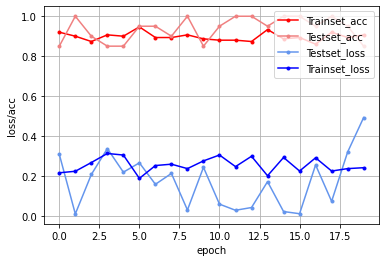

In [22]:
# 모델 컴파일하기
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizers.Adam(learning_rate = 0.0002),
             metrics = ['accuracy'])

# 모델 실행하기
history = model.fit_generator(train_generator,  # steps_per_epoch = 100일때는 안나옴..
                              steps_per_epoch = 30, # 한번의 epoch에서 훈련에 사용할 배치의 개수 지정
                              epochs = 20, # 데이터 셋 20번 훈련
                              validation_data = test_generator, 
                              validation_steps = 4,# 한번의 epoch가 끝날 때 테스트에 사용되는 배치 수 지정
                              verbose = 2)

# - 0:출력 x, 1:훈련의 진행도를 막대로 보여줌, 2:미니 배치마다 손실 정보 출력


# 결과 그래프로 표현하기
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker = '.', c = "red", label = 'Trainset_acc')
plt.plot(x_len, val_acc, marker = '.', c = "lightcoral", label = 'Testset_acc')
plt.plot(x_len, y_vloss, marker = '.', c = "cornflowerblue", label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = "blue", label = 'Trainset_loss')

plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()